# DCA Ingest - DROID Analysis

Dieses Notebook führt eine DROID-Analyse auf einem Ordner durch und speichert die Ergebnisse als CSV.

## Imports und Setup

In [1]:
import os
import subprocess

## Konfiguration

Hier werden alle Pfade und Parameter definiert.

In [2]:
# Dynamisch das Home-Verzeichnis holen
home_dir = os.path.expanduser("~")
base_path = os.path.join(home_dir, "work")

# Dataset-Name definieren
dataset_to_analyze = "2104_mockup"

# Pfade definieren
droid_script_path = os.path.join(base_path, "27_DCA_Ingest/src/droid-binary-6.7.0-bin/droid.sh")
folder_to_analyze = os.path.join(base_path, f"dcaonnextcloud-500gb/DigitalMaterialCopies/Semiramis/302_V-Zug_Documentation/{dataset_to_analyze}")
output_folder = os.path.join(base_path, f"dcaonnextcloud-500gb/dca-metadataraw/Semiramis/{dataset_to_analyze}_results")
output_csv_path = os.path.join(output_folder, "analysis_result_2.csv")

print(f"Analyzing folder: {folder_to_analyze}")
print(f"Output will be saved to: {output_csv_path}")

Analyzing folder: /home/renku/work/dcaonnextcloud-500gb/DigitalMaterialCopies/Semiramis/302_V-Zug_Documentation/2104_mockup
Output will be saved to: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/analysis_result_2.csv


## DROID-Analyse ausführen

Führt die DROID-Analyse auf dem konfigurierten Ordner aus.

In [3]:
import os
import subprocess

try:
    # Output-Ordner erstellen (falls nicht vorhanden)
    os.makedirs(output_folder, exist_ok=True)

    print(f"Analyzing folder: {folder_to_analyze}")
    print(f"Output will be saved to: {output_csv_path}")

    # DROID-Skript ausführen mit "best match only"
    result = subprocess.run(
        [
            droid_script_path,
            "-R", folder_to_analyze,
            "-o", output_csv_path,
            "-Pr", "profile.generateHash=true",
            "-ff", "file_name not startswith ~$"
        ],
        check=True,
        capture_output=True,
        text=True
    )

    print("DROID output:", result.stdout)
    print(f"Analysis complete. The result is saved in {output_csv_path}.")

except subprocess.CalledProcessError as e:
    print(f"An error occurred while running DROID: {e}")
    print("DROID error output:", e.stderr)

except PermissionError as e:
    print(f"Permission error: {e}")
    print("Bitte prüfe, ob du Schreibrechte für den Zielordner hast.")

except FileNotFoundError as e:
    print(f"Datei oder Verzeichnis nicht gefunden: {e}")
    print("Bitte prüfe, ob alle Pfade korrekt sind und existieren.")

Analyzing folder: /home/renku/work/dcaonnextcloud-500gb/DigitalMaterialCopies/Semiramis/302_V-Zug_Documentation/2104_mockup
Output will be saved to: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/analysis_result_2.csv
DROID output: 2025-11-12T14:55:05,942  INFO [main] DroidCommandLine:225 - Starting DROID.
2025-11-12T14:55:06,910  INFO [main] ProfileManagerImpl:129 - Creating profile: 1762959306910
2025-11-12T14:55:06,934  INFO [main] ProfileInstance:365 - Attempting state change [INITIALISING] to [VIRGIN]
2025-11-12T14:55:08,872  INFO [main] ProfileManagerImpl:265 - Starting profile: 1762959306910
2025-11-12T14:55:08,872  INFO [main] ProfileInstance:365 - Attempting state change [VIRGIN] to [RUNNING]
2025-11-12T14:58:48,737  INFO [pool-2-thread-1] ProfileInstance:365 - Attempting state change [RUNNING] to [FINISHED]
2025-11-12T14:58:49,747  INFO [main] ProfileManagerImpl:369 - Profile: 1762959306910 written as CSV to /home/renku/work/dcaonnextcloud

## Analyse der DROID-Ergebnisse

Die folgenden Zellen führen verschiedene Analysen auf den DROID-Ergebnissen durch.

In [4]:
%pip install pandas matplotlib pywaffle seaborn 


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zu src/ hinzufügen, um lokale Module zu importieren
src_path = os.path.join(base_path, "27_DCA_Ingest/src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Versuche, pywaffle zu installieren/importieren (falls benötigt)
try:
    from pywaffle import Waffle
    print("pywaffle ist verfügbar")
except ImportError:
    print("Hinweis: pywaffle ist nicht installiert. Waffle-Charts werden übersprungen.")
    print("Installieren Sie pywaffle mit: pip install pywaffle")

try:
    import seaborn as sns
    print("seaborn ist verfügbar")
except ImportError:
    print("Hinweis: seaborn ist nicht installiert. Heatmaps werden möglicherweise übersprungen.")
    print("Installieren Sie seaborn mit: pip install seaborn")

pywaffle ist verfügbar
seaborn ist verfügbar


In [6]:
# Pfade für die Analyse konfigurieren
# CSV_PATH: Pfad zur DROID-Ausgabe-CSV
if "output_csv_path" in locals():
    CSV_PATH = output_csv_path
else:
    # Fallback, falls output_csv_path nicht definiert wurde
    CSV_PATH = os.path.join(base_path, f"dcaonnextcloud-500gb/dca-metadataraw/Semiramis/{dataset_to_analyze}_results/analysis_result.csv")

# OUTPUT_DIR: Verzeichnis für Analyse-Ausgaben
OUTPUT_DIR = os.path.join(output_folder, "res")
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"CSV-Datei für Analyse: {CSV_PATH}")
print(f"Ausgabeverzeichnis für Plots: {OUTPUT_DIR}")

CSV-Datei für Analyse: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/analysis_result_2.csv
Ausgabeverzeichnis für Plots: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res


Plot gespeichert unter: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res/format_counts.png


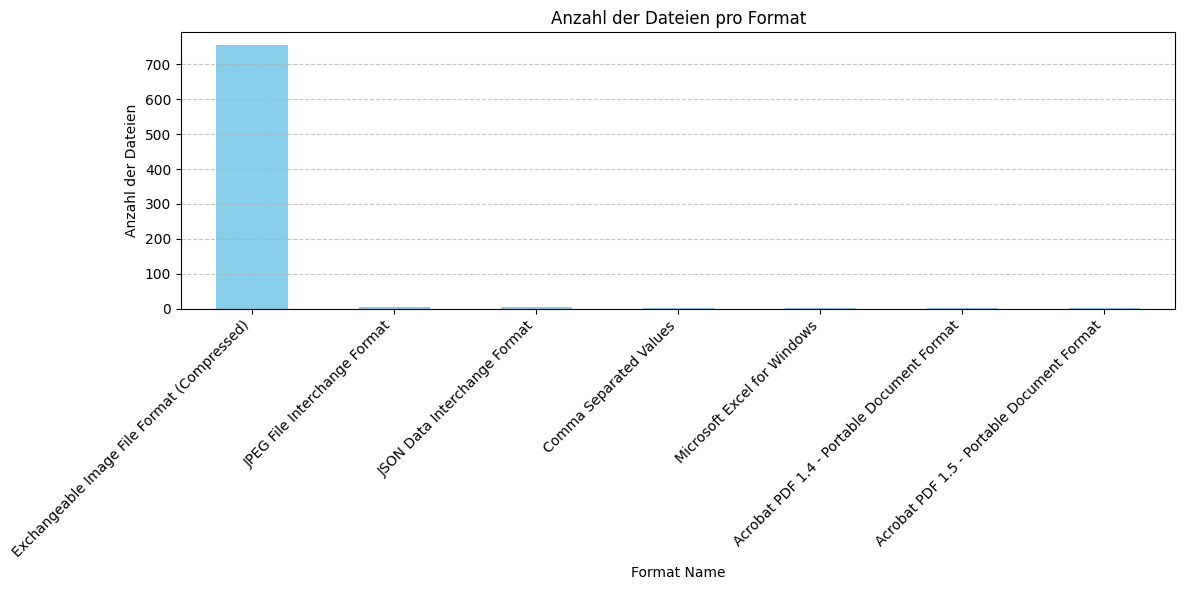

In [9]:
# Analyse: Anzahl der Dateien pro Format
try:
    from analyse_formats import analyse_formats
    analyse_formats(CSV_PATH, OUTPUT_DIR, show_plot=False)
except ImportError:
    print("Hinweis: analyse_formats Modul nicht gefunden. Überspringe diese Analyse.")
except FileNotFoundError as e:
    print(f"Datei nicht gefunden: {e}")
except Exception as e:
    print(f"Fehler bei analyse_formats: {e}")

Analysiere zeitliche Verteilung von: Exchangeable Image File Format (Compressed)
Plot gespeichert unter: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res/exchangeable image file format (compressed)_time_series.png


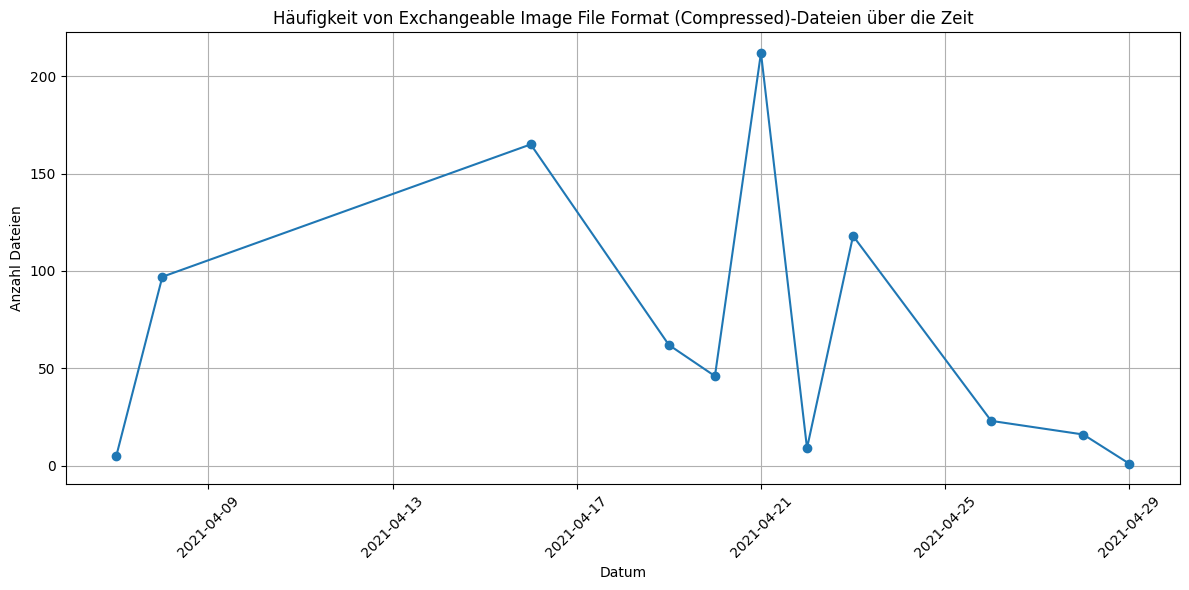

In [10]:
# Analyse: Zeitliche Verteilung eines spezifischen Formats
# Beispiel: Analysiere das häufigste Format über die Zeit
try:
    from analyse_format_over_time import analyse_format_over_time
    
    # Ermittle das häufigste Format
    if os.path.exists(CSV_PATH):
        df = pd.read_csv(CSV_PATH)
        most_common_format = df["FORMAT_NAME"].value_counts().index[0]
        print(f"Analysiere zeitliche Verteilung von: {most_common_format}")
        analyse_format_over_time(CSV_PATH, most_common_format, OUTPUT_DIR, show_plot=False)
    else:
        print(f"CSV-Datei nicht gefunden: {CSV_PATH}")
except ImportError:
    print("Hinweis: analyse_format_over_time Modul nicht gefunden. Überspringe diese Analyse.")
except Exception as e:
    print(f"Fehler bei analyse_format_over_time: {e}")

Waffle-Chart für Zeitraum: 2021-2025
Plot gespeichert unter: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res/waffle_files_per_month_2021_2025.png


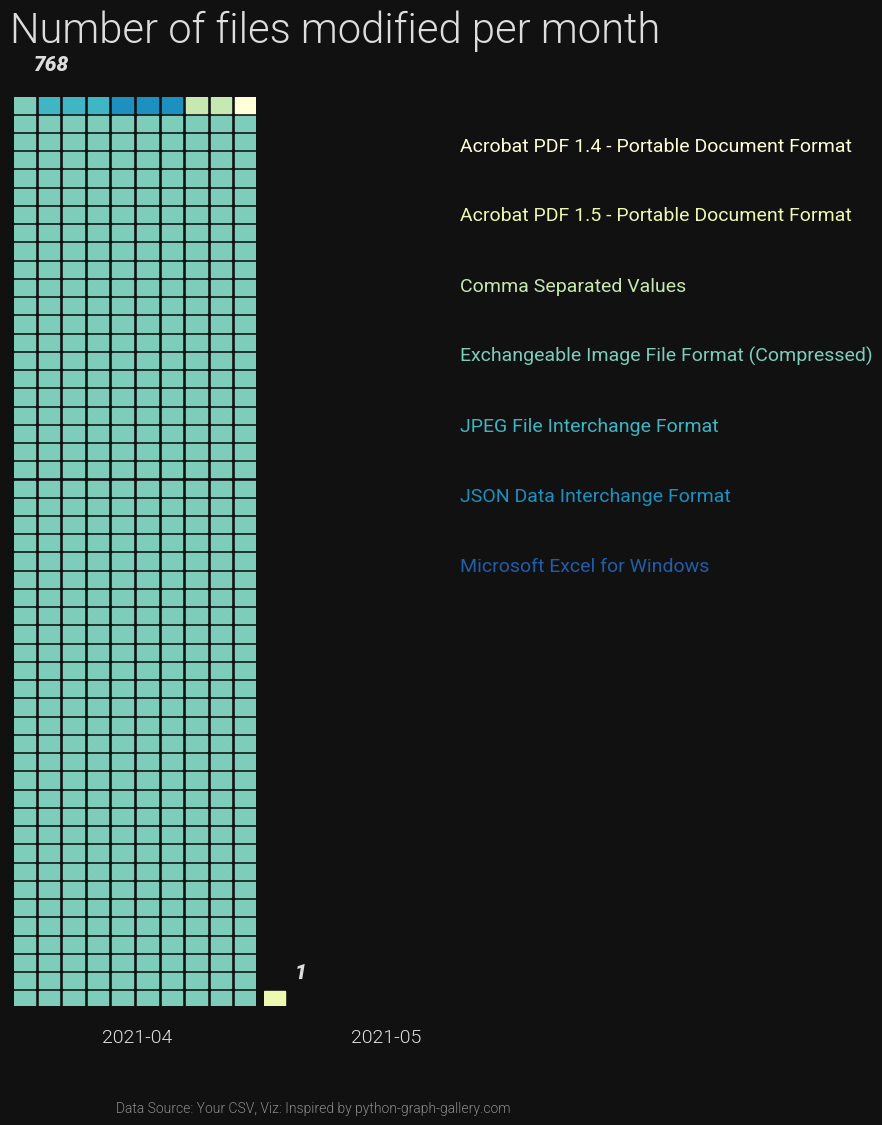

In [11]:
# Analyse: Waffle-Chart für monatliche Dateihäufigkeit
try:
    from generate_waffle import generate_waffle_chart
    
    # Ermittle den Zeitraum aus den Daten
    if os.path.exists(CSV_PATH):
        df = pd.read_csv(CSV_PATH)
        df["LAST_MODIFIED"] = pd.to_datetime(df["LAST_MODIFIED"], errors="coerce")
        df_clean = df.dropna(subset=["LAST_MODIFIED"])
        
        if len(df_clean) > 0:
            start_year = df_clean["LAST_MODIFIED"].dt.year.min()
            end_year = df_clean["LAST_MODIFIED"].dt.year.max()
            print(f"Waffle-Chart für Zeitraum: {start_year}-{end_year}")
            generate_waffle_chart(CSV_PATH, OUTPUT_DIR, start_year, end_year, top_n=10, show_plot=False)
        else:
            print("Keine gültigen Datumsangaben in den Daten gefunden.")
    else:
        print(f"CSV-Datei nicht gefunden: {CSV_PATH}")
except ImportError as e:
    print(f"Hinweis: Modul nicht gefunden ({e}). Überspringe Waffle-Chart.")
    print("Installieren Sie pywaffle falls benötigt: pip install pywaffle")
except Exception as e:
    print(f"Fehler bei generate_waffle_chart: {e}")

Heatmap für Zeitraum: 2021-2025
Plot gespeichert unter: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res/heatmap_top10_formats_by_month_2021_2025.png


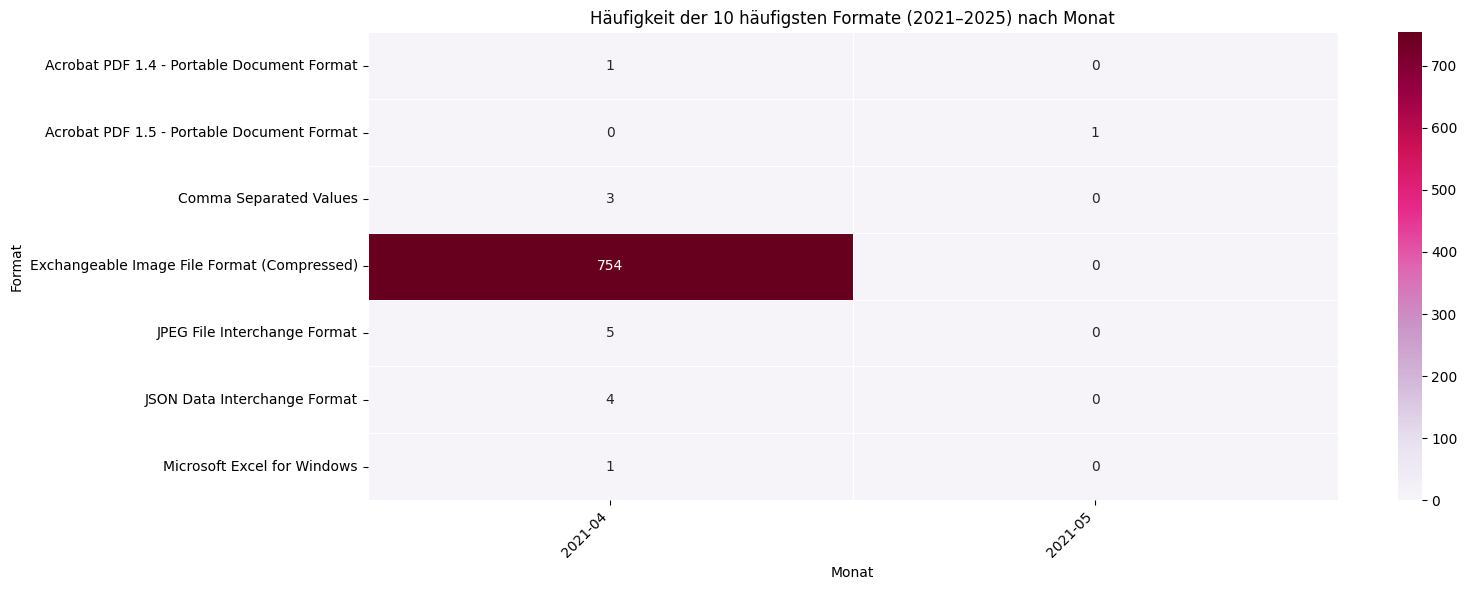

In [12]:
# Analyse: Heatmap der häufigsten Formate nach Monat
try:
    from analyse_format_heatmap import generate_format_heatmap
    
    # Ermittle den Zeitraum aus den Daten
    if os.path.exists(CSV_PATH):
        df = pd.read_csv(CSV_PATH)
        df["LAST_MODIFIED"] = pd.to_datetime(df["LAST_MODIFIED"], errors="coerce")
        df_clean = df.dropna(subset=["LAST_MODIFIED"])
        
        if len(df_clean) > 0:
            start_year = df_clean["LAST_MODIFIED"].dt.year.min()
            end_year = df_clean["LAST_MODIFIED"].dt.year.max()
            print(f"Heatmap für Zeitraum: {start_year}-{end_year}")
            generate_format_heatmap(CSV_PATH, OUTPUT_DIR, start_year, end_year, top_n=10, show_plot=False)
        else:
            print("Keine gültigen Datumsangaben in den Daten gefunden.")
    else:
        print(f"CSV-Datei nicht gefunden: {CSV_PATH}")
except ImportError as e:
    print(f"Hinweis: Modul nicht gefunden ({e}). Überspringe Heatmap.")
    print("Installieren Sie seaborn falls benötigt: pip install seaborn")
except Exception as e:
    print(f"Fehler bei generate_format_heatmap: {e}")

In [14]:
!pip install rdflib ipywidgets pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.0/569.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.2 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [ ]:

# ============================================================================
# CRMdig File Relations Cell
# ============================================================================
# This cell provides interactive and programmatic tools for recording
# relations between files using CRMdigital (CRMdig) vocabulary.
#
# Prerequisites:
#   pip install rdflib ipywidgets
# ============================================================================

import sys
import os

# Import the CRMdig RDF module
# Add src path if not already in sys.path
if 'base_path' in locals():
    src_path = os.path.join(base_path, "27_DCA_Ingest/src")
else:
    src_path = os.path.join(os.path.expanduser("~"), "work/27_DCA_Ingest/src")

if src_path not in sys.path:
    sys.path.insert(0, src_path)

from crmdig_rdf import ensure_uids, build_graph_from_dataframe, add_relations_to_graph, save_graph, interactive_relation_builder

# ============================================================================
# Configuration
# ============================================================================

# Reuse CSV_PATH and OUTPUT_DIR from earlier cells
# (These should be defined in previous notebook cells)
if 'CSV_PATH' not in locals() or 'OUTPUT_DIR' not in locals():
    print("Warning: CSV_PATH and OUTPUT_DIR not found. Using defaults.")
    CSV_PATH = os.path.join(os.path.expanduser("~"), "work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/analysis_result.csv")
    OUTPUT_DIR = os.path.join(os.path.expanduser("~"), "work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res")
    os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set base namespace for RDF URIs
BASE_NS = "http://example.org/dca"

# Set output RDF file path
OUT_RDF = os.path.join(OUTPUT_DIR, "relations.ttl")

print(f"CSV Path: {CSV_PATH}")
print(f"Output RDF: {OUT_RDF}")
print(f"Base Namespace: {BASE_NS}")

# ============================================================================
# Step 1: Ensure Stable UIDs exist in CSV
# ============================================================================

print("\nEnsuring stable UIDs in CSV...")
df = ensure_uids(CSV_PATH, base_ns=BASE_NS, uid_column='uid', inplace=True)
print(f"✓ UIDs ensured for {len(df)} files")

# ============================================================================
# Step 2: Interactive Relation Builder (Jupyter UI)
# ============================================================================

# Uncomment the following line to launch the interactive UI:
interactive_relation_builder(CSV_PATH, OUT_RDF, base_ns=BASE_NS, uid_column='uid')

print("\nTo launch the interactive UI, uncomment the line above and run this cell.")

# ============================================================================
# Step 3: Programmatic Example (Alternative to Interactive UI)
# ============================================================================
# 
# If you prefer to create relations programmatically instead of using the UI,
# uncomment and modify the example below:
#
# # Build graph from CSV
# graph = build_graph_from_dataframe(df, base_ns=BASE_NS, uid_column='uid')
# print(f"Graph initialized with {len(graph)} triples")
#
# # Define relations between files
# # Example: File A is output of Process B, File C derives from File A
# relations = [
#     {
#         "subject_uid": "your-file-uid-1",  # Replace with actual UID from CSV
#         "object_uid": "your-file-uid-2",
#         "predicate": "is output of",
#         "label": "Converted from original scan"
#     },
#     {
#         "subject_uid": "your-file-uid-3",
#         "object_uid": "your-file-uid-1",
#         "predicate": "derives from",
#         "label": "Enhanced version"
#     },
# ]
#
# # Add relations to graph
# add_relations_to_graph(graph, relations, base_ns=BASE_NS)
# print(f"Added {len(relations)} relations to graph")
#
# # Save graph to file
# save_graph(graph, OUT_RDF, format='turtle')
# print(f"✓ Graph saved to: {OUT_RDF}")
#
# # Display some triples
# print("\nSample triples:")
# for i, (s, p, o) in enumerate(graph):
#     if i < 10:
#         print(f"  {s} -> {p} -> {o}")
#     else:
#         break

print("\n" + "="*70)
print("CRMdig Relations Cell Ready!")
print("Choose one:")
print("1. Uncomment interactive_relation_builder() line to use the UI")
print("2. Uncomment the programmatic example to create relations via code")
print("="*70)


CSV Path: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/analysis_result_2.csv
Output RDF: /home/renku/work/dcaonnextcloud-500gb/dca-metadataraw/Semiramis/2104_mockup_results/res/relations.ttl
Base Namespace: http://example.org/dca

Ensuring stable UIDs in CSV...
✓ UIDs ensured for 804 files
